In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
df_train = pd.read_csv('../../data/New dataset/Naive Bayes/train_tweets_Naive_Bayes_new.csv')
df_val = pd.read_csv('../../data/New dataset/Naive Bayes/eval_tweets_Naive_Bayes_new.csv')
df_test = pd.read_csv('../../data/New dataset/Naive Bayes/test_tweets_Naive_Bayes_new.csv')

# Validation dataset is not needed
df_train = pd.concat([df_train, df_val], ignore_index=True)

         term       tfidf
1865    bully  937.964892
4720     fuck  929.707138
10248  school  900.392609
8084   nigger  792.537100
3697     dumb  770.592406
6434     joke  643.319127
4937     girl  625.534272
6971     like  613.242506
5473     high  599.317969
4905      get  552.857537
8775   people  530.258207
4840      gay  503.283139
9561     rape  500.798286
10218     say  477.834320
7856   muslim  464.866022
1955     call  461.514863
4975       go  458.727667
7237     make  436.641554
951        as  431.660759
8369      one  423.520987


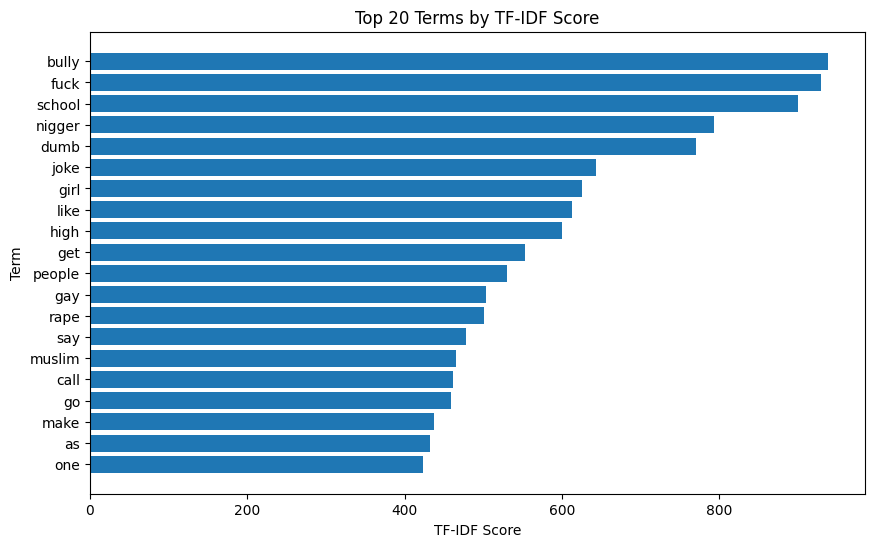

In [28]:

# Vectorizza i dati di testo usando TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X_tfidf = vectorizer.fit_transform(df_train['tweet_text'])

# Somma i punteggi TF-IDF per ogni termine in tutti i documenti
tfidf_scores = X_tfidf.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()
tfidf_scores_df = pd.DataFrame({'term': terms, 'tfidf': tfidf_scores})

# Verifica i termini con i punteggi TF-IDF più alti
print(tfidf_scores_df.sort_values(by='tfidf', ascending=False).head(20))

# Sort the DataFrame by TF-IDF scores in descending order
tfidf_scores_df = tfidf_scores_df.sort_values(by='tfidf', ascending=False)

# Plot the top 20 terms based on TF-IDF scores
plt.figure(figsize=(10, 6))
plt.barh(tfidf_scores_df['term'].head(20)[::-1], tfidf_scores_df['tfidf'].head(20)[::-1])
plt.xlabel('TF-IDF Score')
plt.ylabel('Term')
plt.title('Top 20 Terms by TF-IDF Score')
plt.show()

# Multiclass Naive Bayes Classifier

Function to perform cross validation.

In [29]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

def train_evaluate_model2(train, test, vectorizer, classifier, title, k_best_features, binary=False):
    # Extract features and labels
    X_train, y_train = train["tweet_text"], train["cyberbullying_type"]
    X_test, y_test = test["tweet_text"], test["cyberbullying_type"]

    if binary:
        y_train = y_train.astype('int')
        y_test = y_test.astype('int')
    
    # Vectorize text data
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    
    # Feature Selection
    total_features = X_train.shape[1]
    k_values = [int(total_features * pct) for pct in (0.1, 0.3, 0.5, 1)]
    
    for k in k_values:
        # Apply SelectKBest
        selector = SelectKBest(mutual_info_classif, k=k)
        X_train_k = selector.fit_transform(X_train, y_train)
        X_test_k = selector.transform(X_test)

        # Train classifier
        classifier.fit(X_train_k, y_train)
        
        # Predict on test set
        y_pred = classifier.predict(X_test_k)
        
        # Generate classification report
        print(f'Classification Report for k={k} features:')
        print(classification_report(y_test, y_pred))
        
        # Get the sorted list of unique class labels
        classes = sorted(train['cyberbullying_type'].unique())
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred, labels=classes)
        
        # Plot confusion matrix with title
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
        plt.title(f'{title} (k={k} features)')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()


In [30]:
def train_evaluate_model(train, test, vectorizer, classifier, title, binary = False):
    # Extract features and labels
    X_train, y_train = train["tweet_text"], train["cyberbullying_type"]
    X_test, y_test = test["tweet_text"], test["cyberbullying_type"]

    if binary:
        y_train = y_train.astype('int')
        y_test = y_test.astype('int')
    
    # Vectorize text data
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    
    # Train classifier
    classifier.fit(X_train, y_train)
        
    # Predict on test set
    y_pred = classifier.predict(X_test)
        
    # Generate classification report
    print(classification_report(y_test, y_pred))
    
    # Get the sorted list of unique class labels
    classes = sorted(train['cyberbullying_type'].unique())
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    
    # Plot confusion matrix with title
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Multinomial Naive Bayes Model
- Designed for discrete count-based data (e.g., text data represented by word frequency).	
- Features are counts of occurrences in different classes.
- Text classification, document categorization, sentiment analysis.

Classification Report for k=634 features:
                   precision    recall  f1-score   support

              age       0.83      0.96      0.89      1568
        ethnicity       0.89      0.93      0.91      1502
           gender       0.91      0.80      0.85      1497
not_cyberbullying       0.71      0.48      0.57      1338
         religion       0.81      0.97      0.88      1614

         accuracy                           0.84      7519
        macro avg       0.83      0.83      0.82      7519
     weighted avg       0.83      0.84      0.83      7519



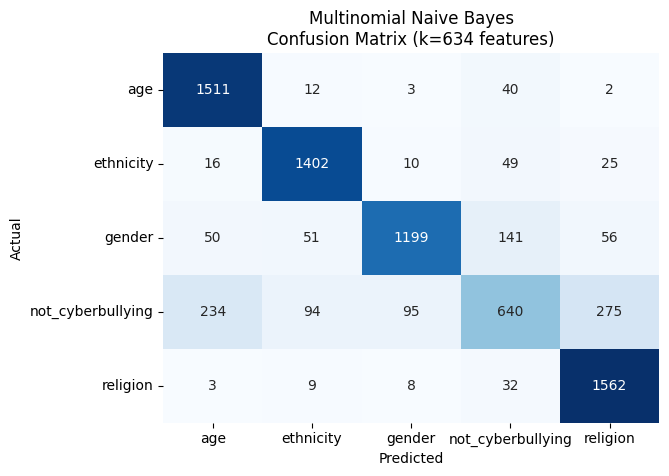

Classification Report for k=1902 features:
                   precision    recall  f1-score   support

              age       0.84      0.97      0.90      1568
        ethnicity       0.90      0.93      0.91      1502
           gender       0.92      0.81      0.86      1497
not_cyberbullying       0.75      0.56      0.64      1338
         religion       0.85      0.97      0.90      1614

         accuracy                           0.86      7519
        macro avg       0.85      0.85      0.84      7519
     weighted avg       0.85      0.86      0.85      7519



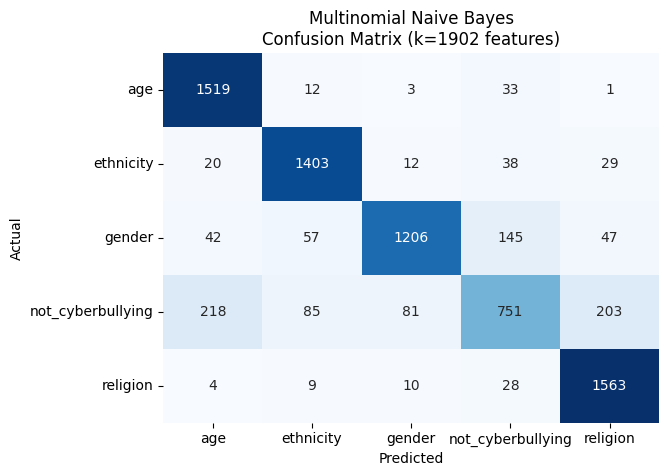

Classification Report for k=3170 features:
                   precision    recall  f1-score   support

              age       0.85      0.97      0.91      1568
        ethnicity       0.90      0.94      0.92      1502
           gender       0.91      0.82      0.86      1497
not_cyberbullying       0.78      0.59      0.67      1338
         religion       0.86      0.97      0.91      1614

         accuracy                           0.86      7519
        macro avg       0.86      0.86      0.85      7519
     weighted avg       0.86      0.86      0.86      7519



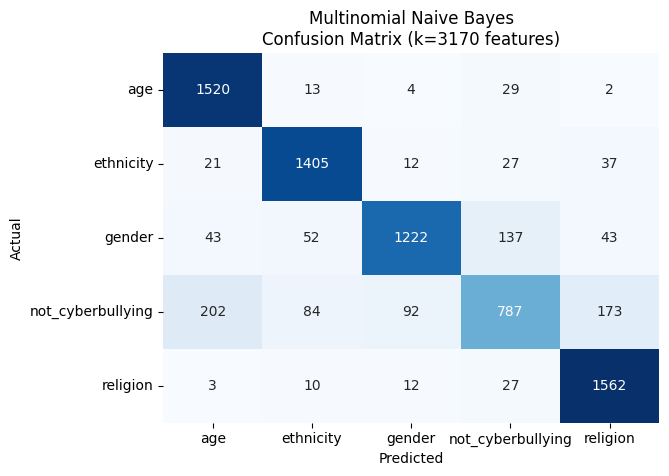

Classification Report for k=6341 features:
                   precision    recall  f1-score   support

              age       0.85      0.97      0.91      1568
        ethnicity       0.90      0.93      0.92      1502
           gender       0.91      0.82      0.86      1497
not_cyberbullying       0.79      0.61      0.69      1338
         religion       0.86      0.97      0.91      1614

         accuracy                           0.87      7519
        macro avg       0.86      0.86      0.86      7519
     weighted avg       0.87      0.87      0.86      7519



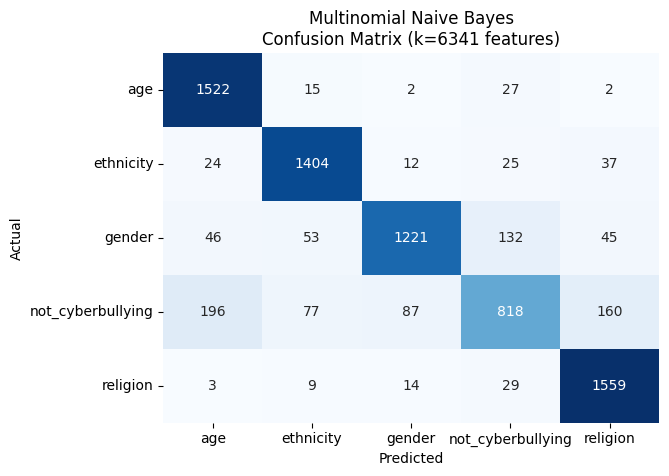

In [31]:
vectorizer = CountVectorizer(min_df=5)
classifier = MultinomialNB()
title = 'Multinomial Naive Bayes\nConfusion Matrix'
train_evaluate_model2(df_train, df_test, vectorizer, classifier, title, k_best_features = 27704)

## Complement Naive Bayes Model
- Designed for categorical data with imbalanced classes.
- Features are represented by attribute frequencies in documents.
- Useful when classes are imbalanced and training data is limited.
- Used in text classification, document categorization, and reviews analysis applications.

                   precision    recall  f1-score   support

              age       0.80      0.97      0.87      1568
        ethnicity       0.87      0.93      0.90      1502
           gender       0.90      0.83      0.86      1497
not_cyberbullying       0.86      0.47      0.60      1338
         religion       0.84      0.98      0.90      1614

         accuracy                           0.85      7519
        macro avg       0.85      0.84      0.83      7519
     weighted avg       0.85      0.85      0.83      7519



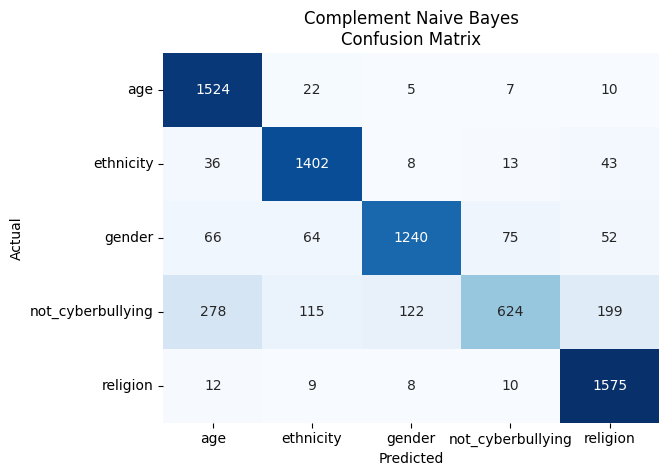

In [17]:
vectorizer = TfidfVectorizer()
classifier = ComplementNB()
title = 'Complement Naive Bayes\nConfusion Matrix'
train_evaluate_model(df_train, df_test, vectorizer, classifier, title)

## Bernoulli Naive Bayes Model

- Designed for discrete count-based data, such as text data represented by word frequency.
- Features are counts of occurrences in different classes.
- Commonly used in text classification, document categorization, and sentiment analysis tasks.

                   precision    recall  f1-score   support

              age       0.97      0.96      0.97      1568
        ethnicity       0.95      0.93      0.94      1502
           gender       0.92      0.81      0.86      1497
not_cyberbullying       0.74      0.85      0.79      1338
         religion       0.91      0.93      0.92      1614

         accuracy                           0.90      7519
        macro avg       0.90      0.90      0.90      7519
     weighted avg       0.90      0.90      0.90      7519



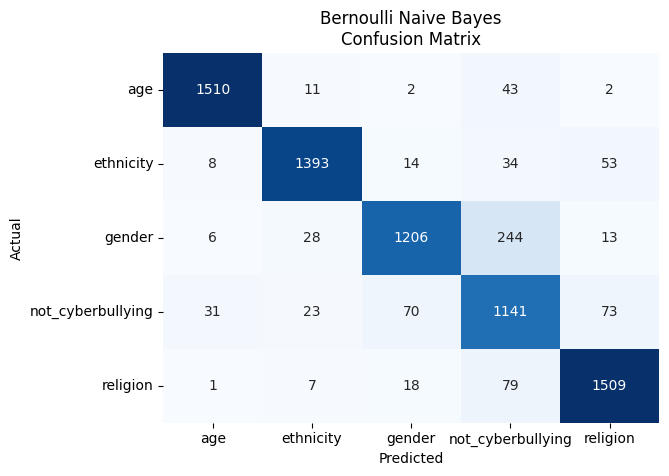

In [18]:
vectorizer = TfidfVectorizer()
classifier = BernoulliNB()
title = 'Bernoulli Naive Bayes\nConfusion Matrix'
train_evaluate_model(df_train, df_test, vectorizer, classifier, title)

# Binary Naive Bayes Classifier

From the original dataset, we selected all the tweets labeled as "not_cyberbullying" and assigned them the category 1. Since there were 7815 such tweets, to achieve a balanced distribution, we selected 1563 tweets for each cyberbullying category and assigned them label 0.

In [19]:
def balanced_dataset(df):

    class_counts = df['cyberbullying_type'].value_counts()
    n = class_counts['not_cyberbullying'] 
    n = int(n / 4)

    # Create an empty dataframe for the results
    result_df = pd.DataFrame(columns=['tweet_text', 'cyberbullying_type'])

    for category in df['cyberbullying_type'].unique():
        if category != 'not_cyberbullying':
            sampled_df = df[df['cyberbullying_type'] == category].sample(n=n, replace=False)
            sampled_df.loc[:, 'cyberbullying_type'] = 0  
            result_df = pd.concat([result_df, sampled_df[['tweet_text', 'cyberbullying_type']]], ignore_index=True)
        else:
            other_cyberbullying_df = df[df['cyberbullying_type'] == category].copy() 
            other_cyberbullying_df.loc[:, 'cyberbullying_type'] = 1 
            result_df = pd.concat([result_df, other_cyberbullying_df[['tweet_text', 'cyberbullying_type']]], ignore_index=True)
    
    return result_df

df_train = balanced_dataset(df_train)
df_test = balanced_dataset(df_test)

## Multinomial Naive Bayes Model

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1336
           1       0.93      0.67      0.78      1338

    accuracy                           0.81      2674
   macro avg       0.83      0.81      0.80      2674
weighted avg       0.83      0.81      0.80      2674



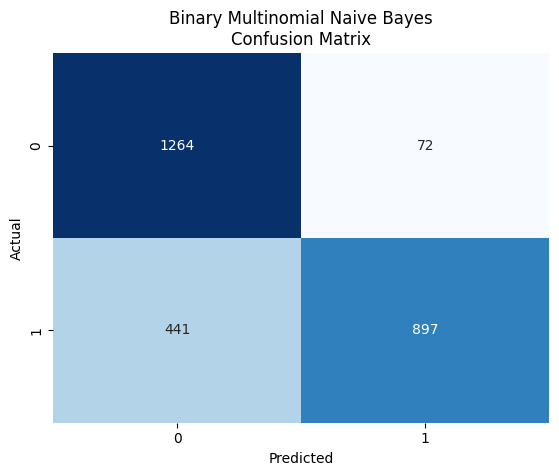

In [20]:
vectorizer = TfidfVectorizer()
classifier = MultinomialNB()
title = 'Binary Multinomial Naive Bayes\nConfusion Matrix'
train_evaluate_model(df_train, df_test, vectorizer, classifier, title, binary = True)

## Complement Naive Bayes Model

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1336
           1       0.93      0.67      0.78      1338

    accuracy                           0.81      2674
   macro avg       0.83      0.81      0.80      2674
weighted avg       0.83      0.81      0.80      2674



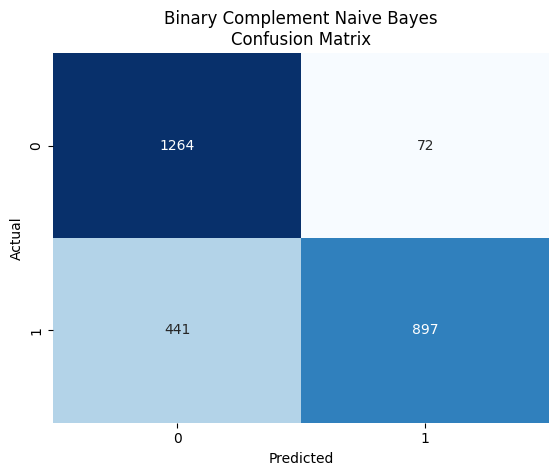

In [21]:
vectorizer = TfidfVectorizer()
classifier = ComplementNB()
title = 'Binary Complement Naive Bayes\nConfusion Matrix'
train_evaluate_model(df_train, df_test, vectorizer, classifier, title, binary = True)

## Bernoulli Naive Bayes Model

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1336
           1       0.88      0.92      0.90      1338

    accuracy                           0.90      2674
   macro avg       0.90      0.90      0.90      2674
weighted avg       0.90      0.90      0.90      2674



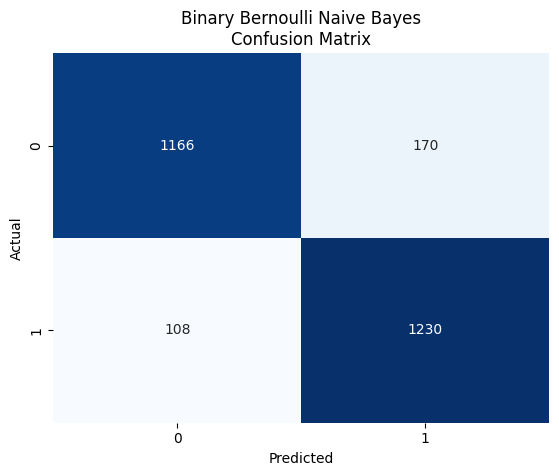

In [22]:
vectorizer = TfidfVectorizer()
classifier = BernoulliNB()
title = 'Binary Bernoulli Naive Bayes\nConfusion Matrix'
train_evaluate_model(df_train, df_test, vectorizer, classifier, title, binary = True)